# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [45]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from pandas import DataFrame 
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import random
import itertools
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [3]:
def find_best_k(data, k_range=(2, 11)):
    """
    Find the best K value for KMeans clustering using distortion and silhouette score methods.

    Parameters:
    - data: DataFrame, input data for clustering
    - k_range: tuple, range of K values to test (default: (2, 11))

    Returns:
    - best_k: int, best K value based on silhouette score
    - best_silhouette_score: float, silhouette score corresponding to the best K
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Initialize lists to store distortion and silhouette scores
    distortions = []
    silhouette_scores = []

    # Set the range of K values you want to try
    k_values = range(*k_range)

    # Iterate through each K value
    for k in k_values:
        # Fit KMeans clustering to the data
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)

        # Calculate distortion and append to list
        distortions.append(kmeans.inertia_)

        # Calculate silhouette score and append to list
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

    # Plot distortion versus K
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, distortions, marker='o')
    plt.title('Distortion vs. K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.show()

    # Plot silhouette score versus K
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    # Choose the appropriate value of K based on the plots
    best_k = silhouette_scores.index(max(silhouette_scores)) + k_range[0]  # Adding k_range[0] to account for starting K value

    # Store the silhouette score for the best K for later comparison
    best_silhouette_score = max(silhouette_scores)

    print(f"Best K value based on silhouette score: {best_k}")
    print(f"Silhouette score for the best K: {best_silhouette_score}")

    return best_k, best_silhouette_score

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



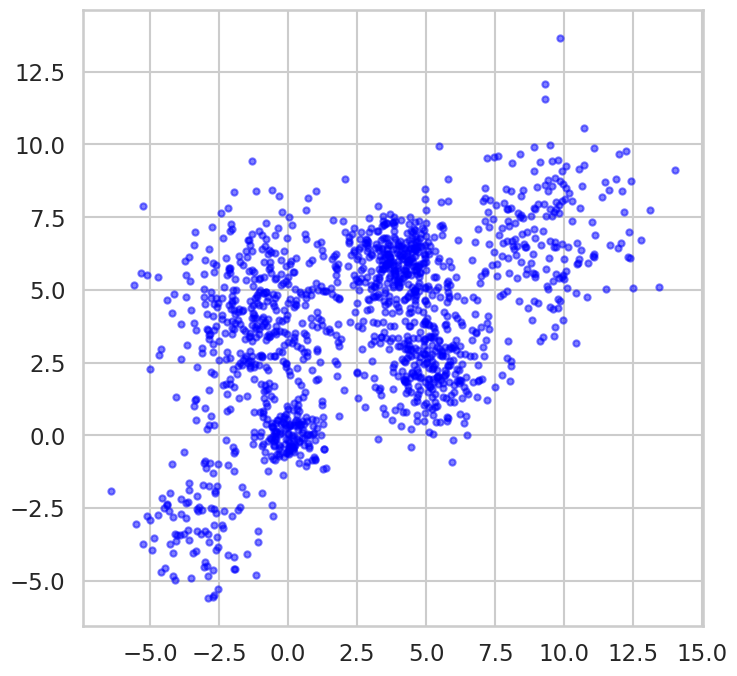

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [5]:
# Create a DataFrame
df = pd.DataFrame(Multi_blob_Data, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = y
df

,Feature 1,Feature 2,Cluster
0,-2.354272,-3.179744,0
1,-2.158005,-1.020061,0
2,-3.304399,-3.304378,0
3,-0.947023,-2.002335,0
4,-3.610317,-2.294672,0
...,...,...,...
1445,9.240137,3.378037,5
1446,10.305952,7.366174,5
1447,9.864057,13.674604,5
1448,5.457008,9.931984,5


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [6]:
# temp dataframe to keep the original data
df_kclustered=df.copy()

In [7]:
#Create Multiple Clusters
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_kclustered[['Feature 1','Feature 2']])
    df_kclustered[f'KMeans_{k}'] = kmeans.labels_

In [8]:
df_kclustered

,Feature 1,Feature 2,Cluster,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,-2.354272,-3.179744,0,0,1,0,3,2
1,-2.158005,-1.020061,0,0,1,0,3,2
2,-3.304399,-3.304378,0,0,1,0,3,2
3,-0.947023,-2.002335,0,0,1,0,3,2
4,-3.610317,-2.294672,0,0,1,0,3,2
...,...,...,...,...,...,...,...,...
1445,9.240137,3.378037,5,0,0,2,2,0
1446,10.305952,7.366174,5,0,0,2,2,0
1447,9.864057,13.674604,5,0,0,2,2,0
1448,5.457008,9.931984,5,0,0,2,2,4


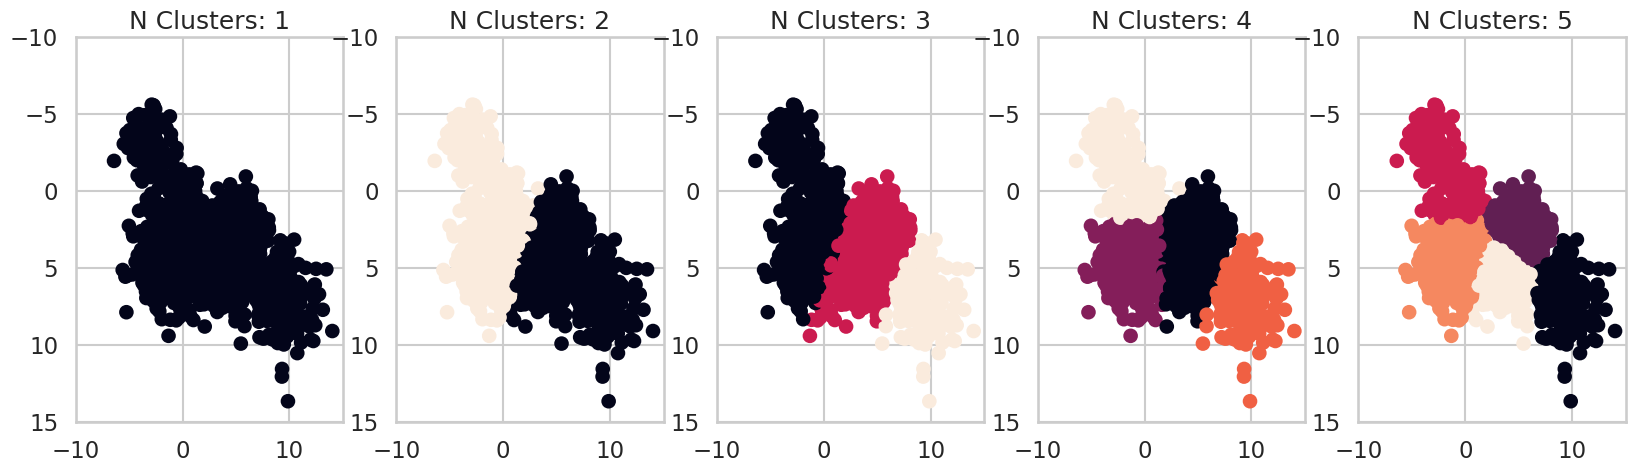

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_kclustered['Feature 1'],y=df['Feature 2'],c=df_kclustered[f'KMeans_{i}'])
    ax.set_ylim(15,-10)
    ax.set_xlim(-10,15)
    ax.set_title(f'N Clusters: {i}')

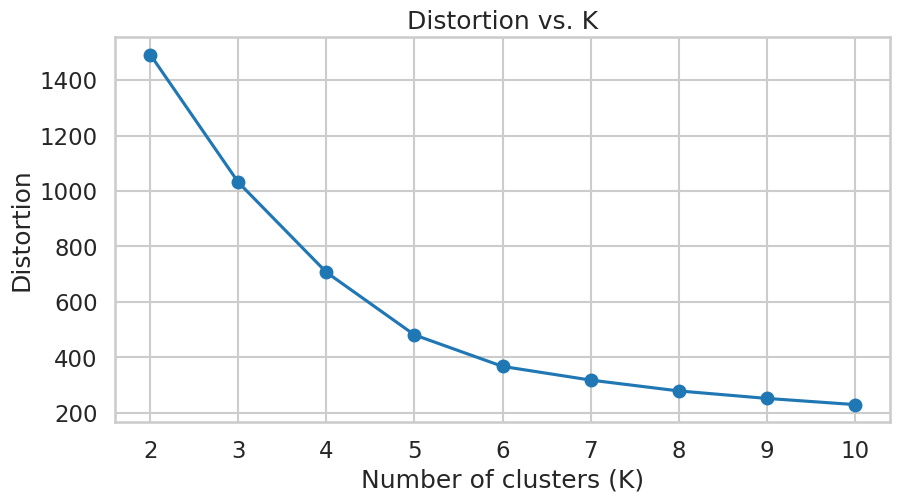

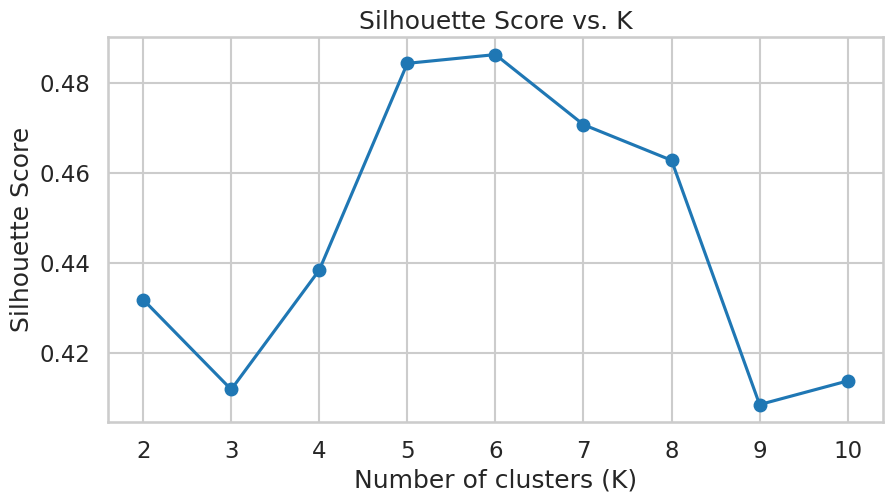

Best K value based on silhouette score: 6
Silhouette score for the best K: 0.4862522276594508


In [10]:
# Find the best K value
best_k, best_silhouette_score = find_best_k(df_kclustered[['Feature 1','Feature 2']])

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [11]:
def perform_dbscan(df,eps,min_samples):

    dbscan=DBSCAN(eps=eps, min_samples=min_samples)
    labels=dbscan.fit_predict(df)
    # it will return the labeled number of each cluster, if -1 , it's a noise
    np.unique(labels)
    return labels

In [12]:
def plot_dbscan(dataframe, clusters_labels, eps, min_samples):
    # Number of unique clusters, ignoring noise if present.
    n_clusters = len(set(clusters_labels)) - (1 if -1 in clusters_labels else 0)
    
    # Generate colors for clusters.
    colors = plt.cm.jet(np.linspace(0, 1, n_clusters))
    
    # Assign noise a unique color.
    noise_color = 'gray'
    
    # Plot each cluster.
    for cluster_label, color in zip(set(clusters_labels), colors):
        if cluster_label == -1:
            # Plot noise.
            cluster_mask = (clusters_labels == cluster_label)
            plt.scatter(dataframe.iloc[cluster_mask, 0], dataframe.iloc[cluster_mask, 1], color=noise_color, s=10)
        else:
            # Plot cluster.
            cluster_mask = (clusters_labels == cluster_label)
            plt.scatter(dataframe.iloc[cluster_mask, 0], dataframe.iloc[cluster_mask, 1], color=color, s=10)
    
    plt.xlabel(dataframe.columns[0])
    plt.ylabel(dataframe.columns[1])
    plt.title('DBSCAN Clustering (EPS={}, Min Samples={})'.format(eps, min_samples))
    plt.show()


In [13]:
# temp dataframe to keep the original data
df_dbclustered=df.copy()

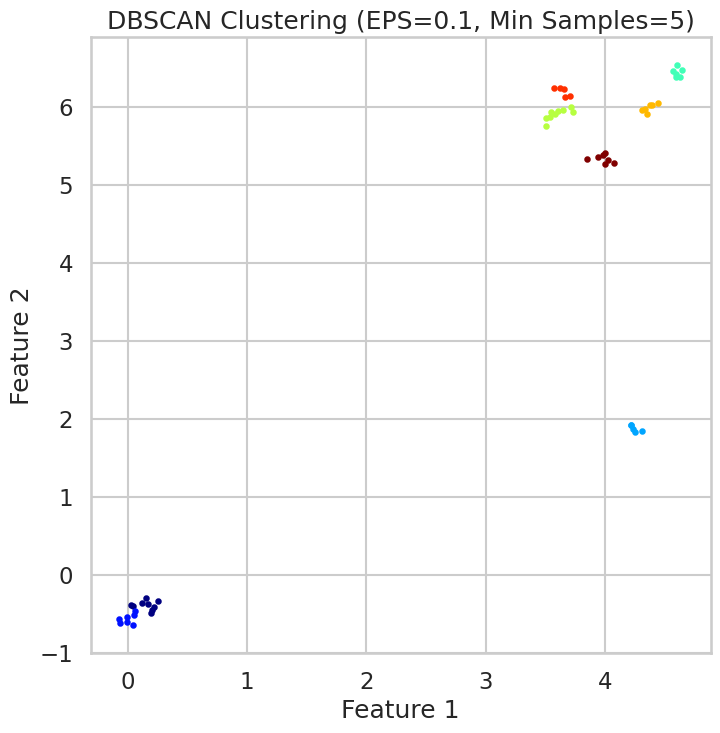

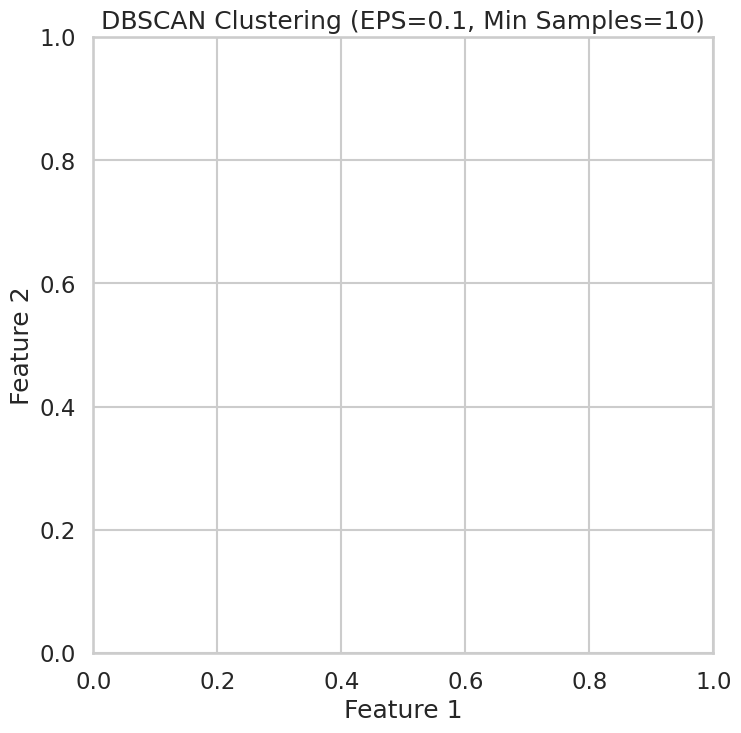

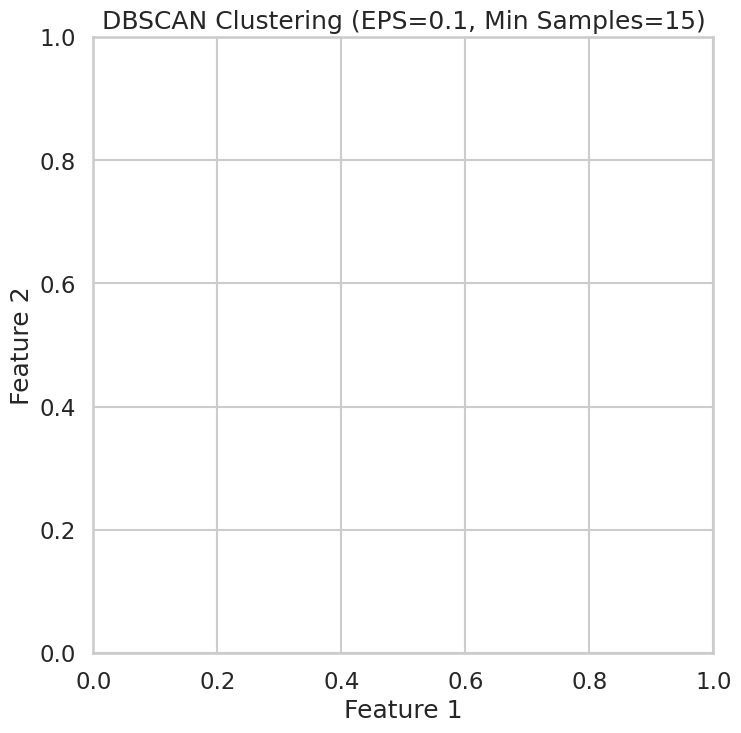

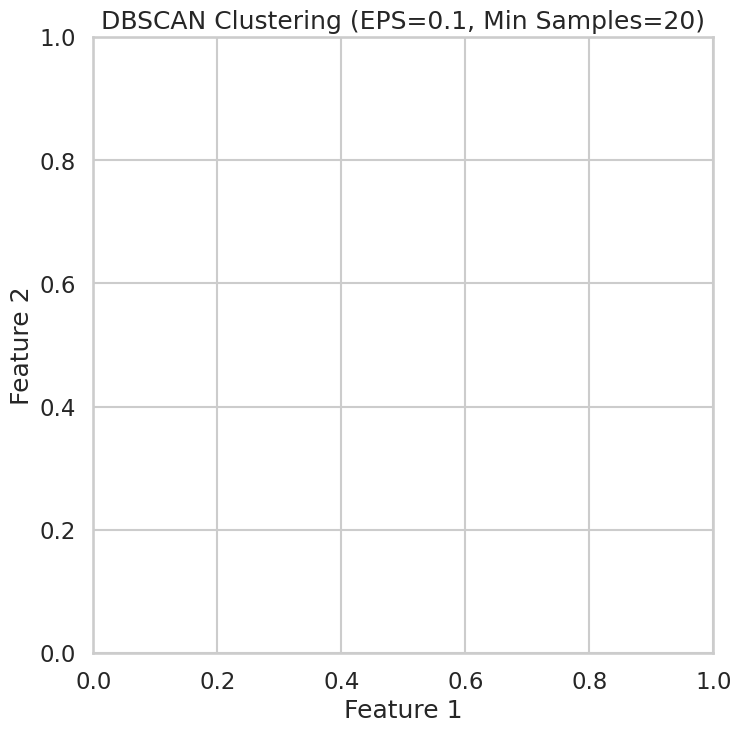

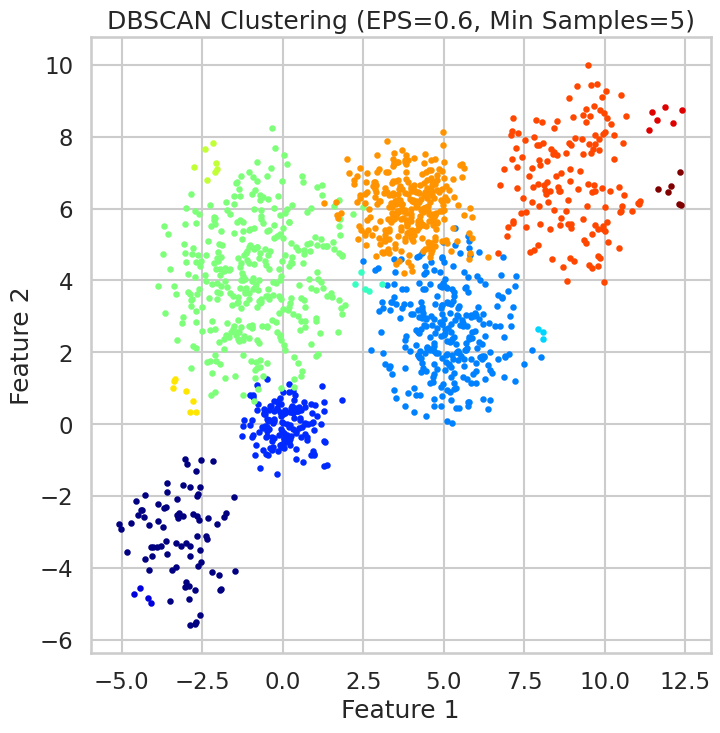

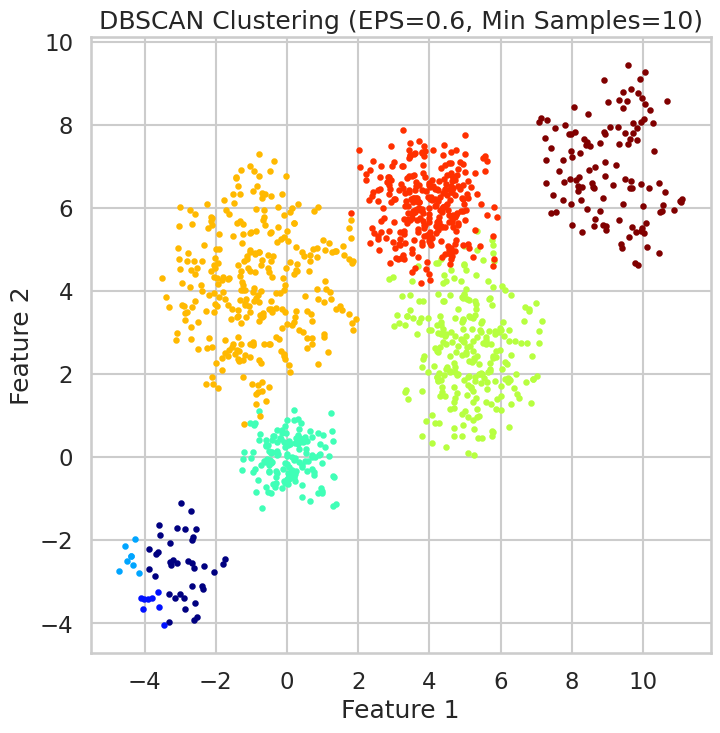

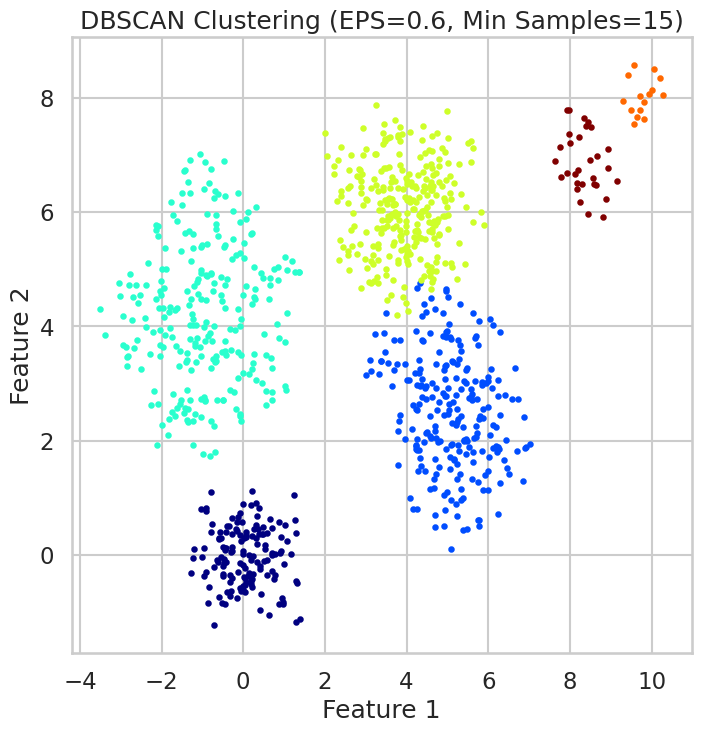

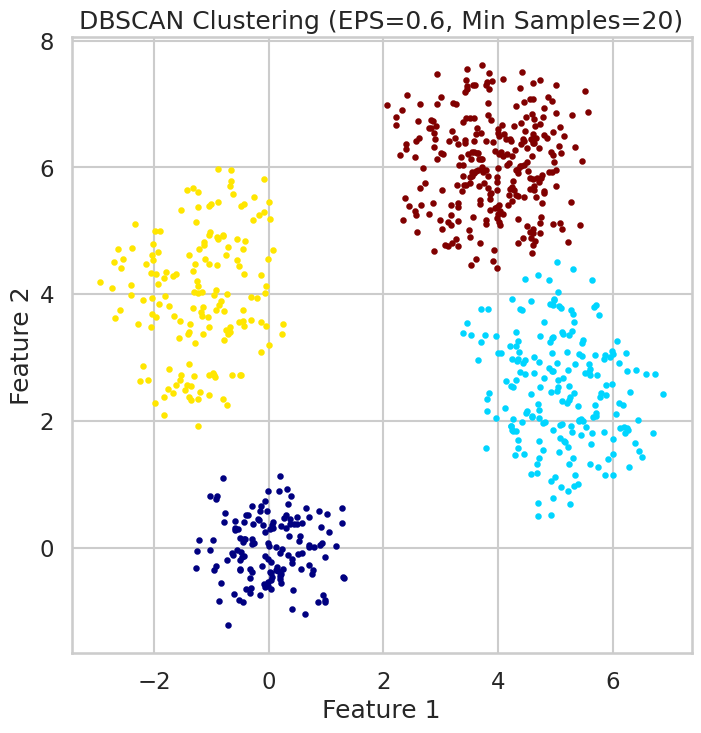

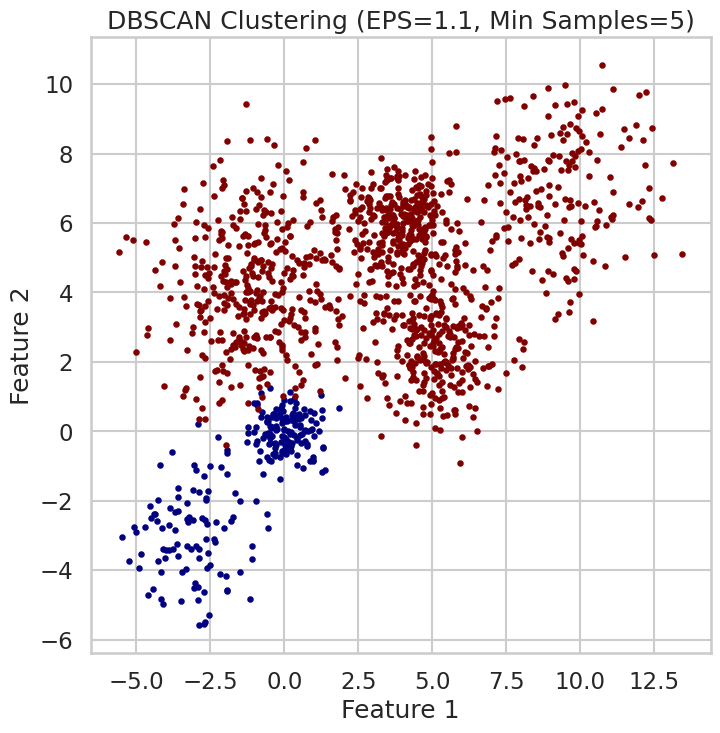

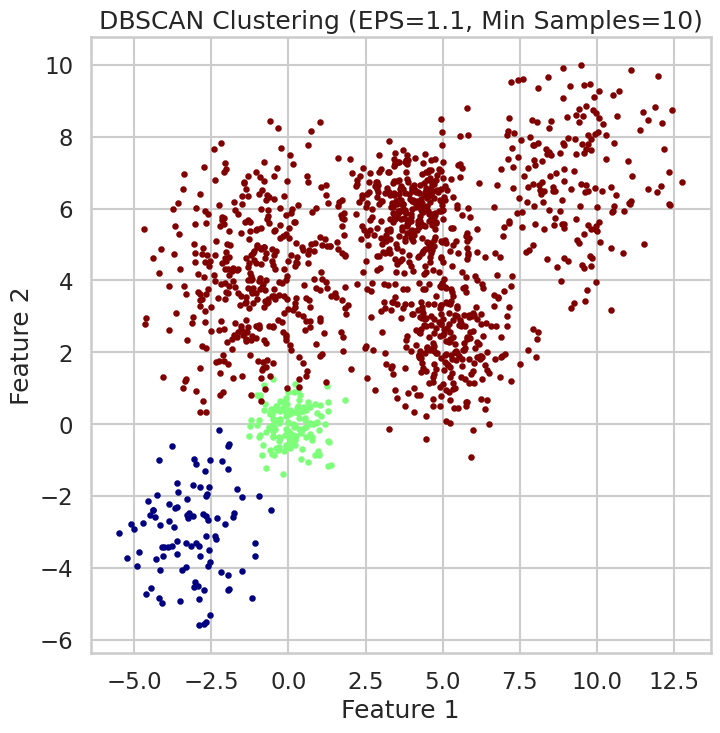

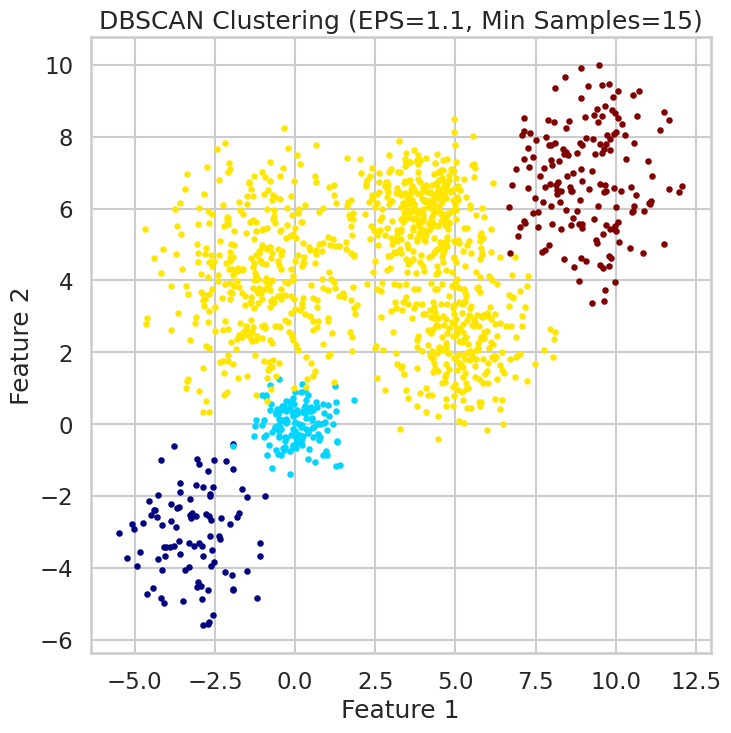

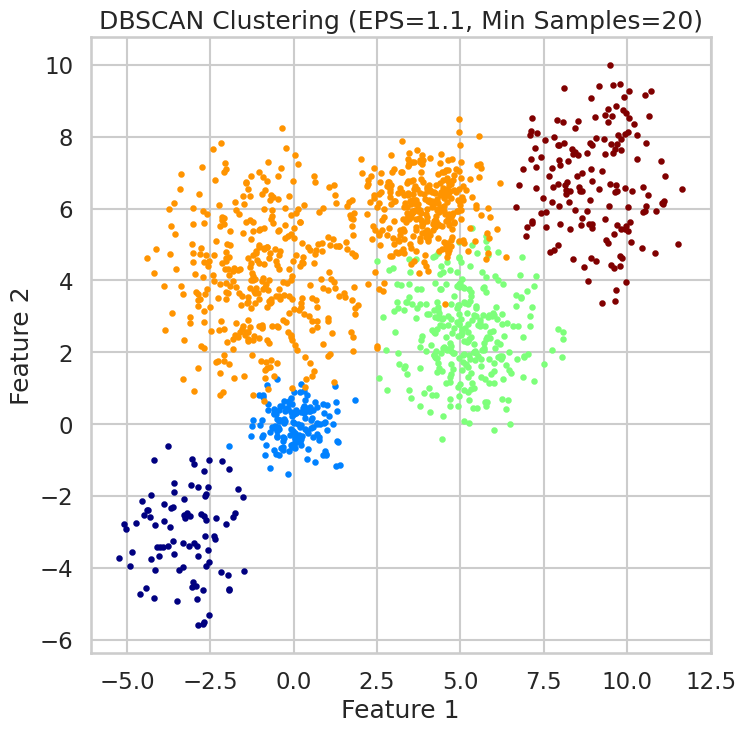

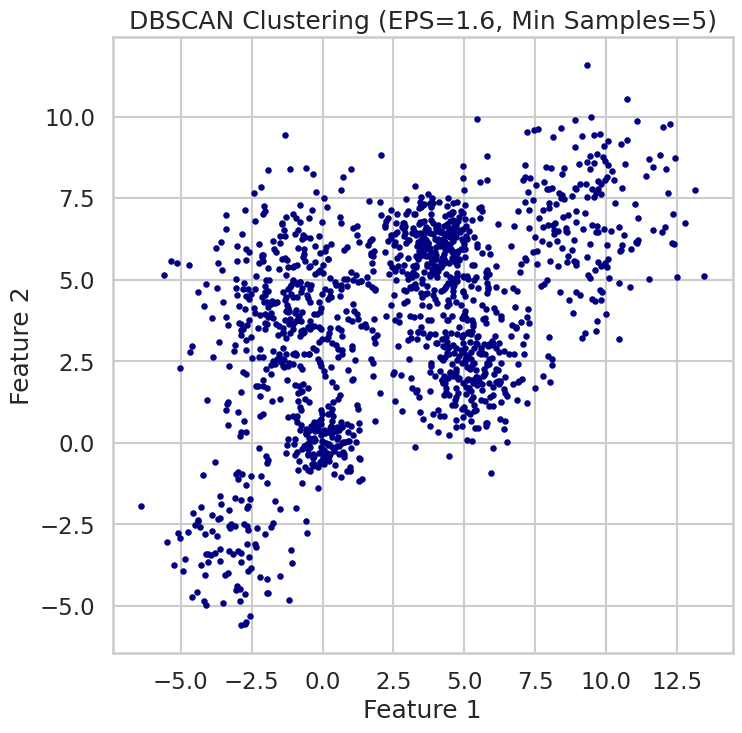

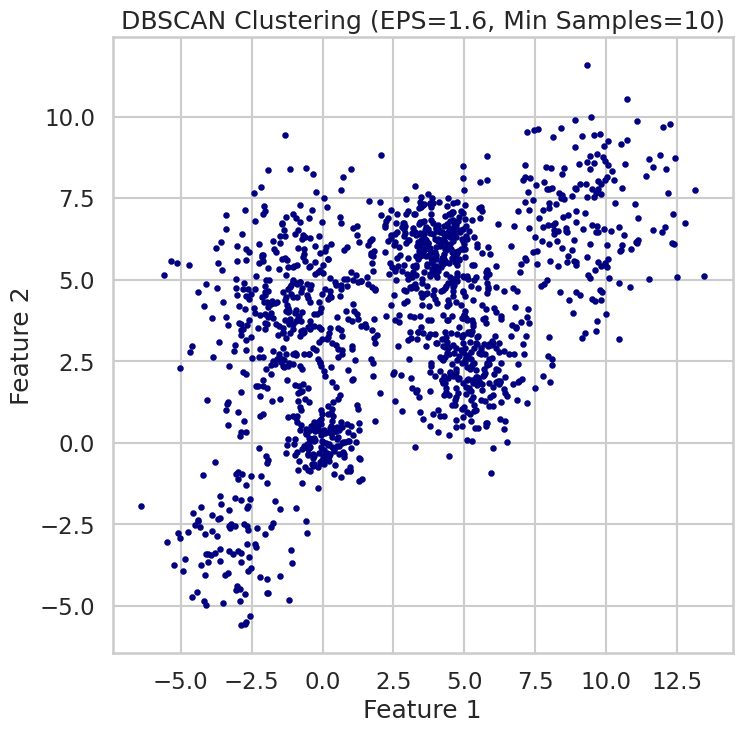

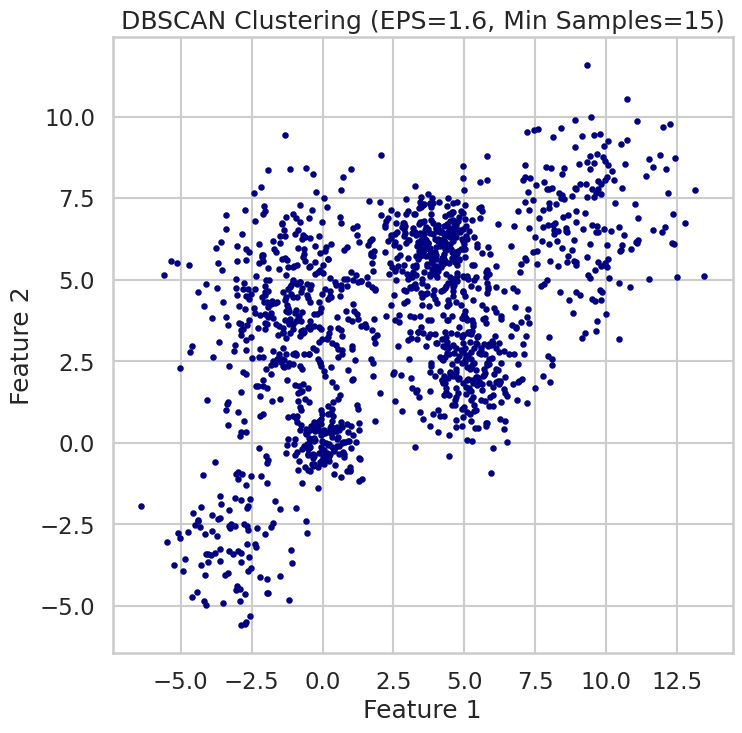

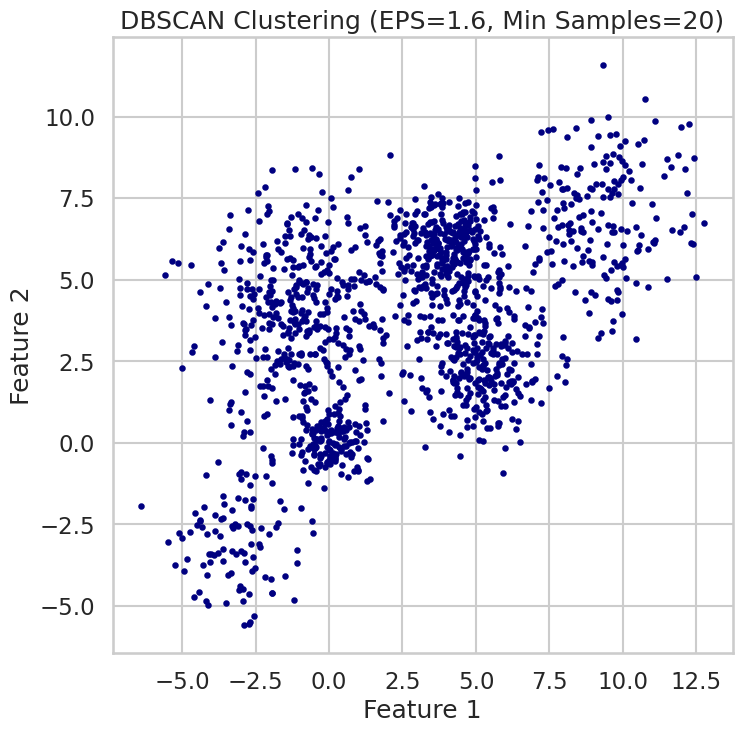

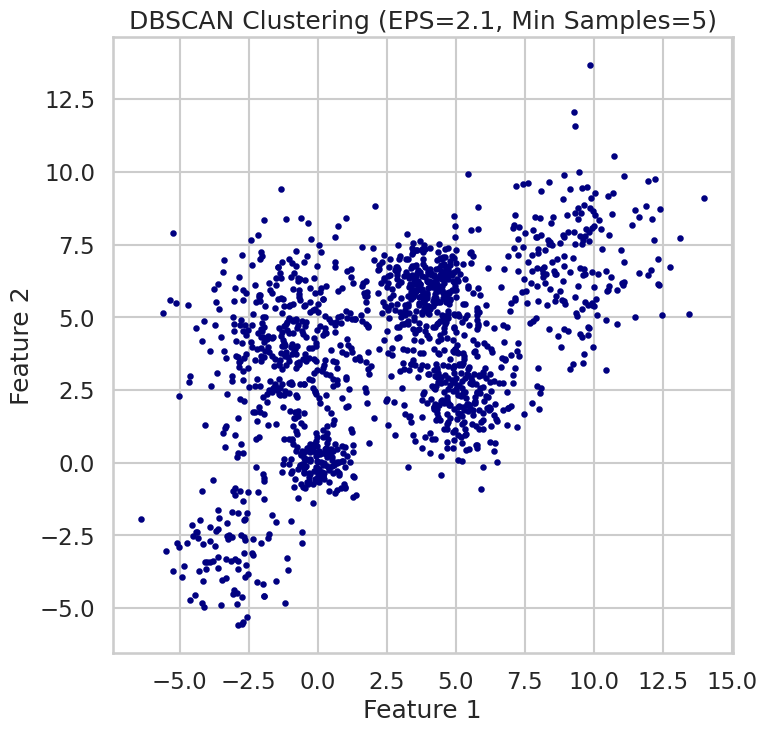

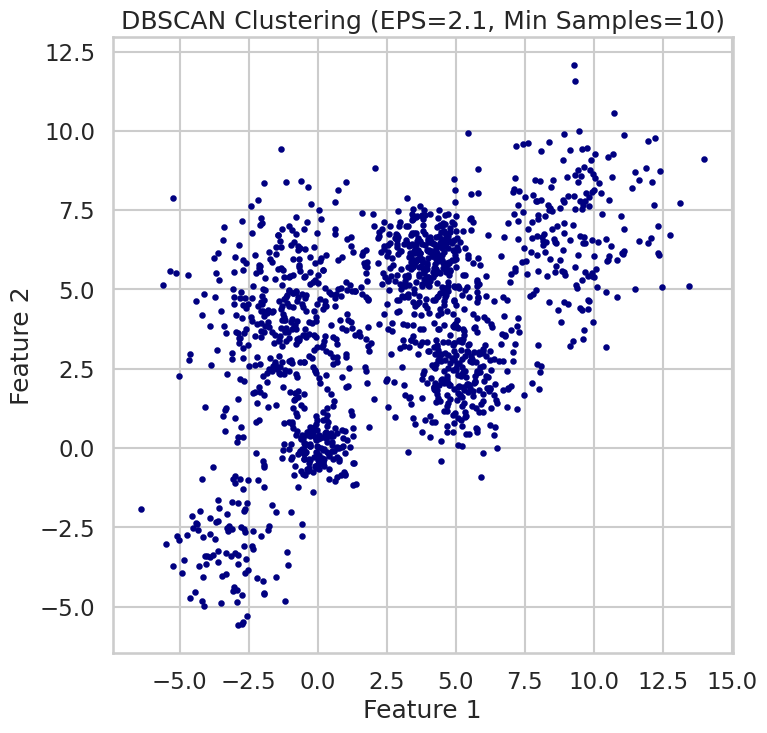

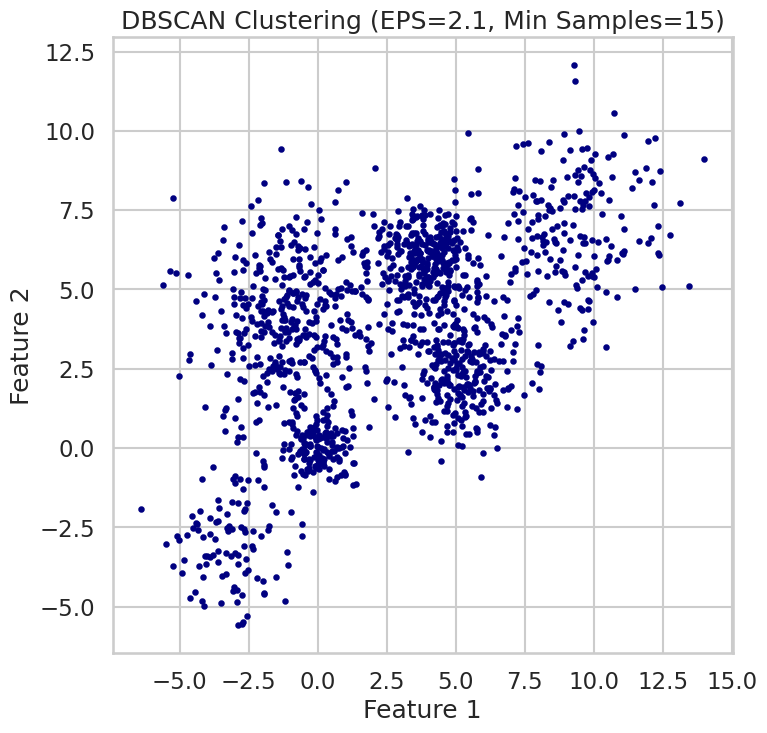

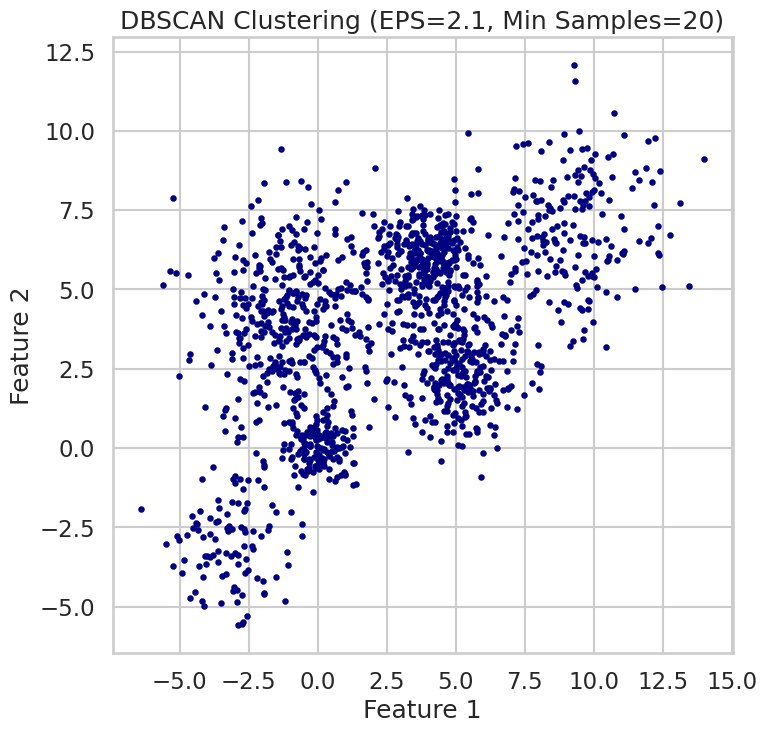

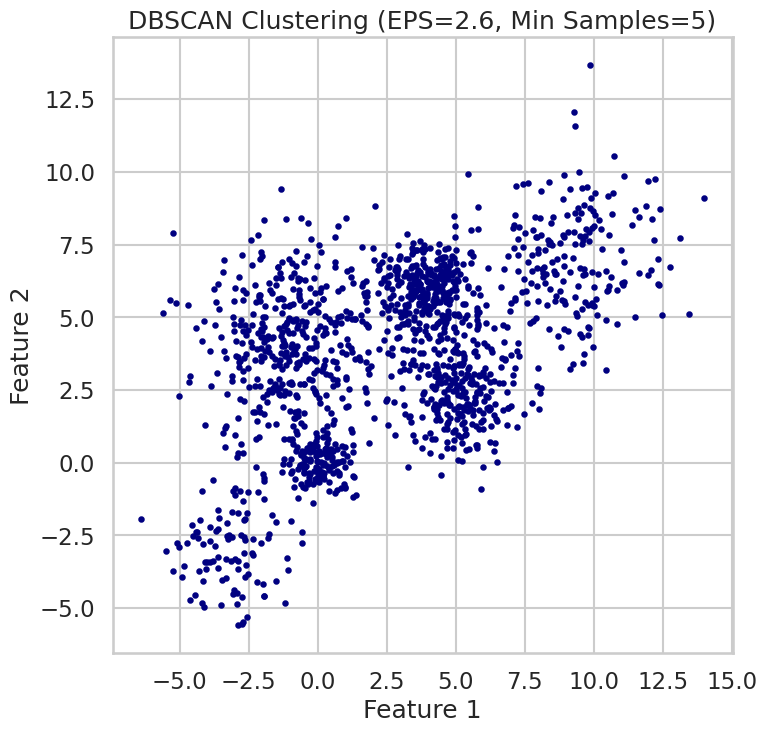

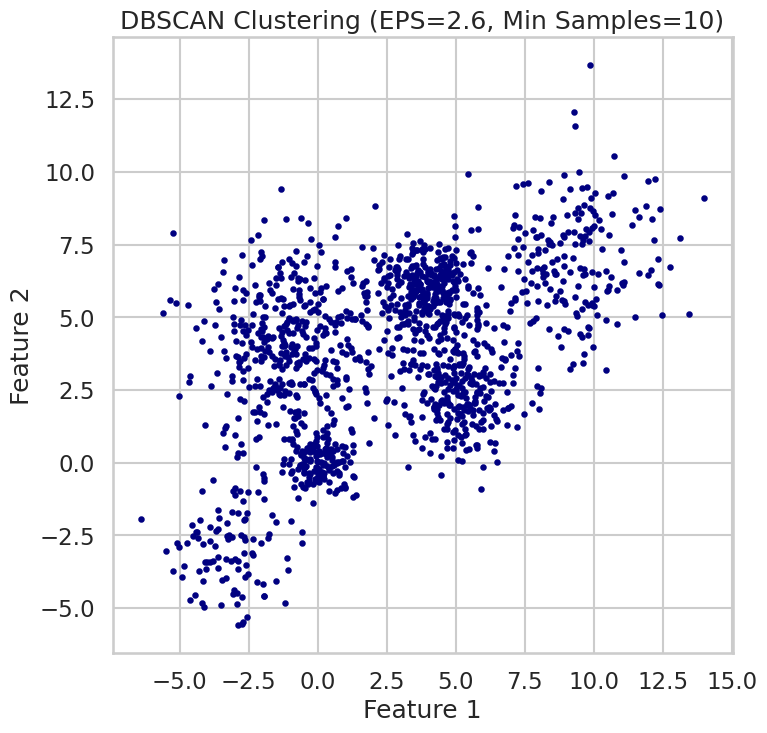

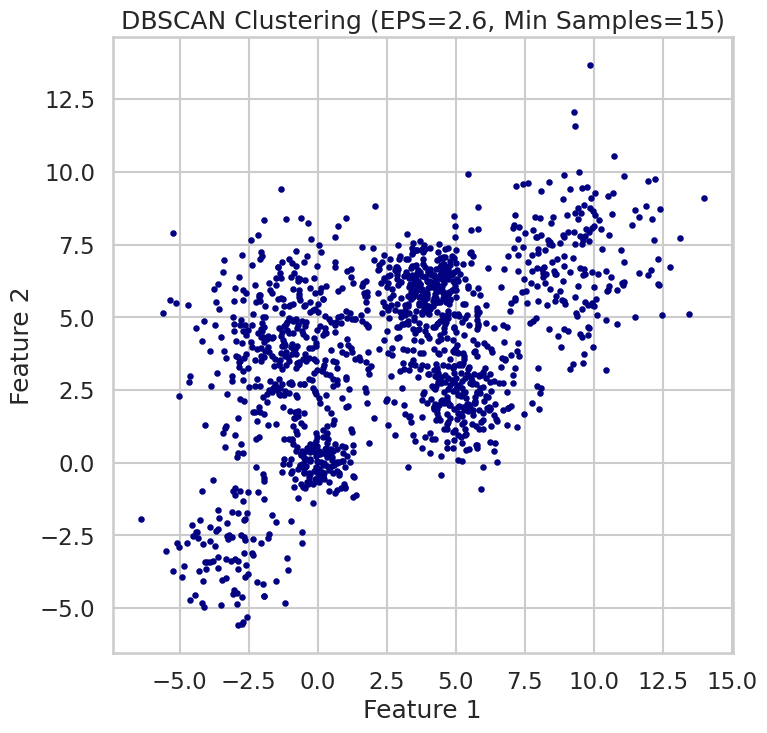

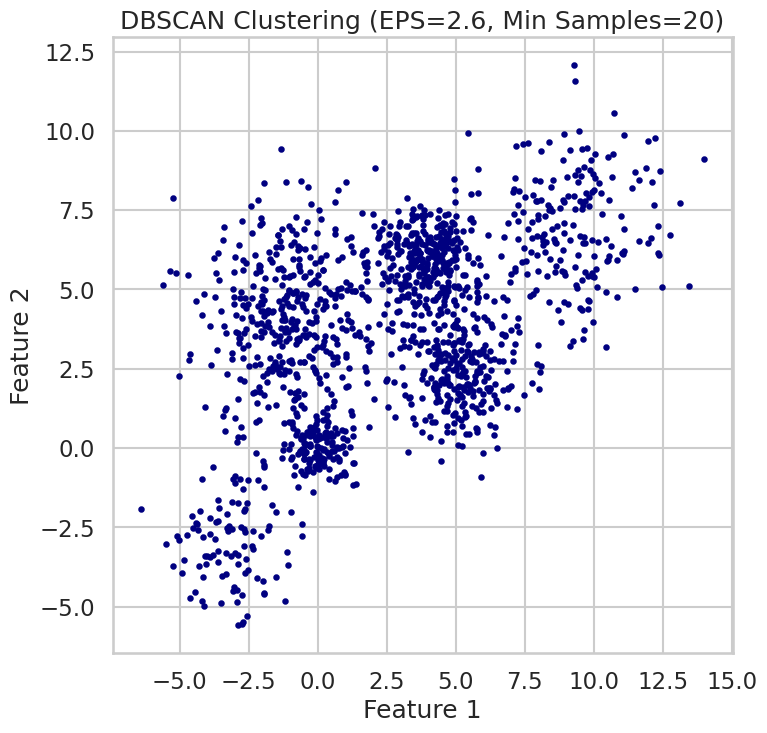

In [110]:
# Perforn DBSCAN with different values of EPS and Min_Samples
for eps, min_samples in itertools.product(np.arange(0.1, 3.1, 0.5), np.arange(5, 25, 5)):
    db_clusters = perform_dbscan(df_dbclustered, eps, min_samples)
    plot_dbscan(df_dclustered, db_clusters, eps, min_samples)


## Comments about DBScan
- for the small values  of epsilon, it is not able to cluster the data points. It means that there are too many noise
- for the high values of epsilon , it's also not working properly. It is clustering all the points.
- Thus, the optimum solution to choose average values of epsilon

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [60]:
# temp Dataframe to keep the original data
df_gmm=df.copy()

In [139]:

def perform_gmm(data,no_of_clusters,cov_type):
    X = data.values
    gmm = GaussianMixture(n_components=no_of_clusters, covariance_type=cov_type).fit(X)
    #gm.get_params() """{'covariance_type': 'full','init_params': 'kmeans','max_iter': 100,'means_init': None,'n_components': 5,'n_init': 1,'precisions_init': None,'random_state': None,'reg_covar': 1e-06,'tol': 0.001,'verbose': 0,'verbose_interval': 10,'warm_start': False,'weights_init': None}""" 
    centers=gmm.means_

    #Visulize centers
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], label="data")
    plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
    plt.legend()
    plt.show()

    #Predict from gm
    pred = gmm.predict(X)
    # Create DataFrame to store data and predicted labels
    df = DataFrame({'x':X[:,0], 'y':X[:,1], 'label':pred})

    # Group data points by their predicted labels
    groups = df.groupby('label')

    # Visualize the clustered data points
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.scatter(group.x, group.y, label=name)

    ax.legend()
    plt.title('Gaussian Mixture Model with {} components and a {} covariance_type'.format(no_of_clusters,cov_type))
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

In [50]:
def plot_multiple_gmm(dataframe):
    # Graph shows all the clusters and their belonging elements.
    X = dataframe.values
    f = plt.figure(figsize=(8, 6), dpi=80)

    for i in range(2, 6):
        gmm = GaussianMixture(n_components=i).fit(X)
        pred = gmm.predict(X)
        df = DataFrame({'x':X[:,0], 'y':X[:,1], 'label':pred})
        groups = df.groupby('label')
        f.add_subplot(2, 2, i-1)
        for name, group in groups:
            plt.scatter(group.x, group.y, label=name, s=8)
            plt.title("Cluster size: " + str(i))
            plt.legend()

    plt.tight_layout()
    plt.show()

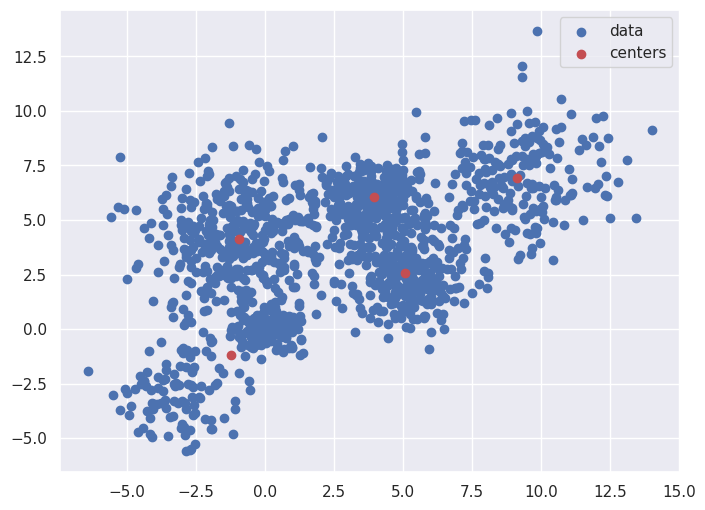

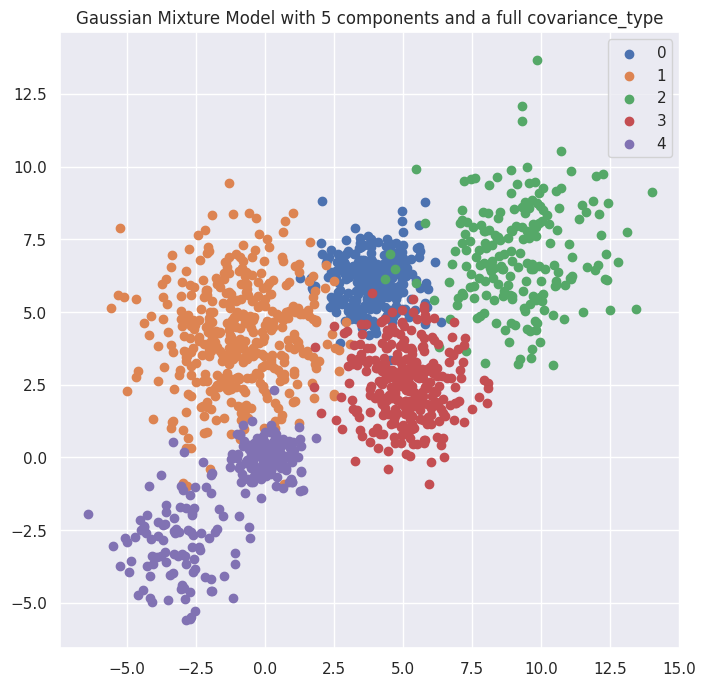

In [61]:
perform_gmm(df_gmm,5,"full")

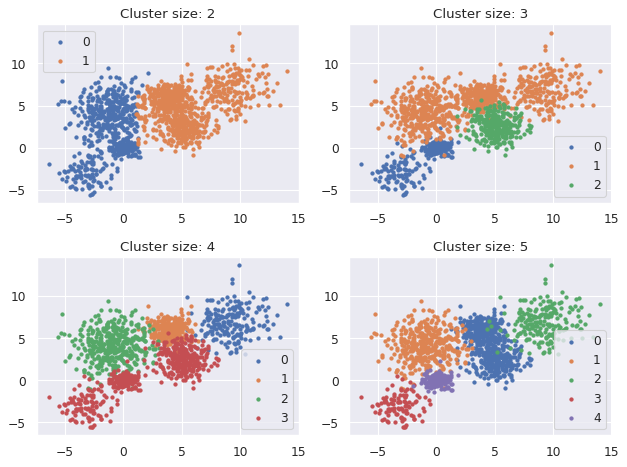

In [62]:
plot_multiple_gmm(df_gmm)

## Comments about GMM
- from the above, we notice that the smaller values of K , the less points that are mixed between clusters

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [79]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [83]:
# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_df['target'] = iris.target


In [84]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [86]:
#Normilze data
scaler=StandardScaler()
iris_norm=iris_df.copy()
iris_norm[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]=scaler.fit_transform(iris_norm[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])

In [96]:
# temp dataframe to keep the original data
iris_kclustered=iris_norm.copy()

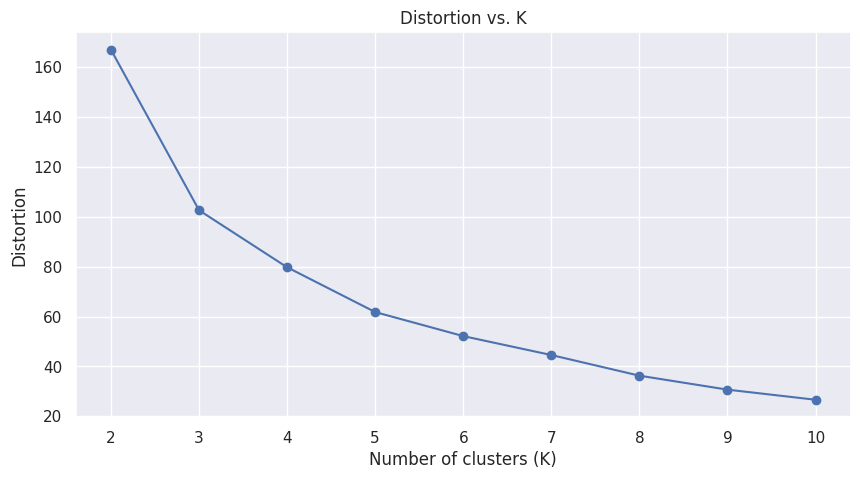

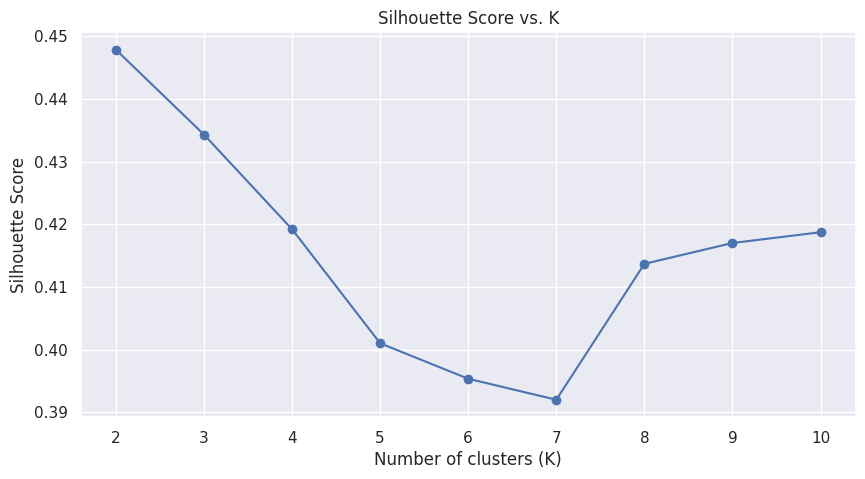

Best K value based on silhouette score: 2
Silhouette score for the best K: 0.44787107939489856


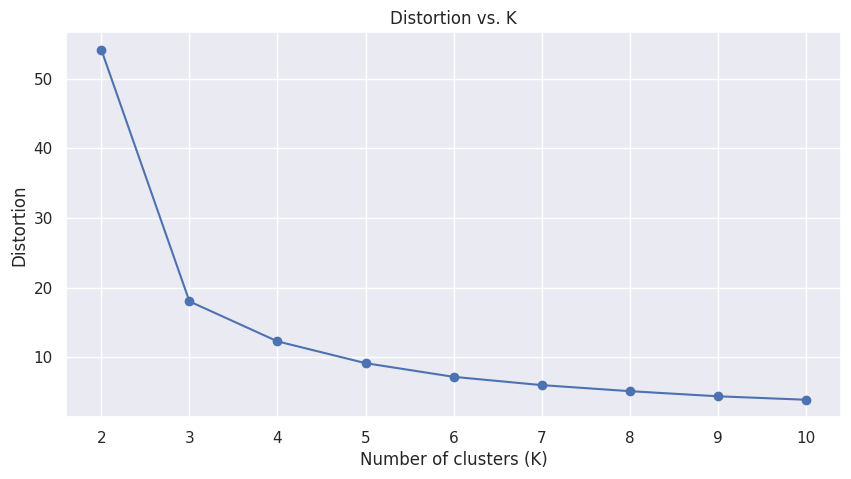

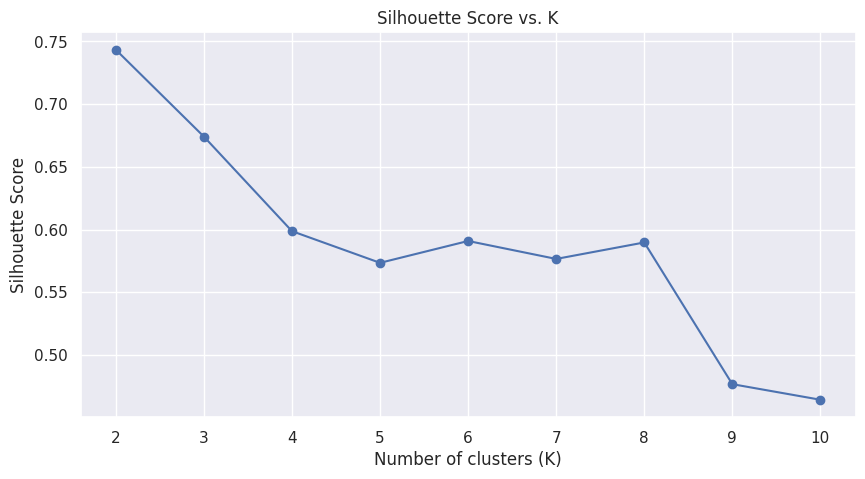

Best K value based on silhouette score: 2
Silhouette score for the best K: 0.7433719504089183


In [95]:
# Find the best K value
best_k, best_silhouette_score = find_best_k(iris_kclustered[['sepal length (cm)','sepal width (cm)']])
best_k_p, best_silhouette_score_p = find_best_k(iris_kclustered[['petal length (cm)','petal width (cm)']])

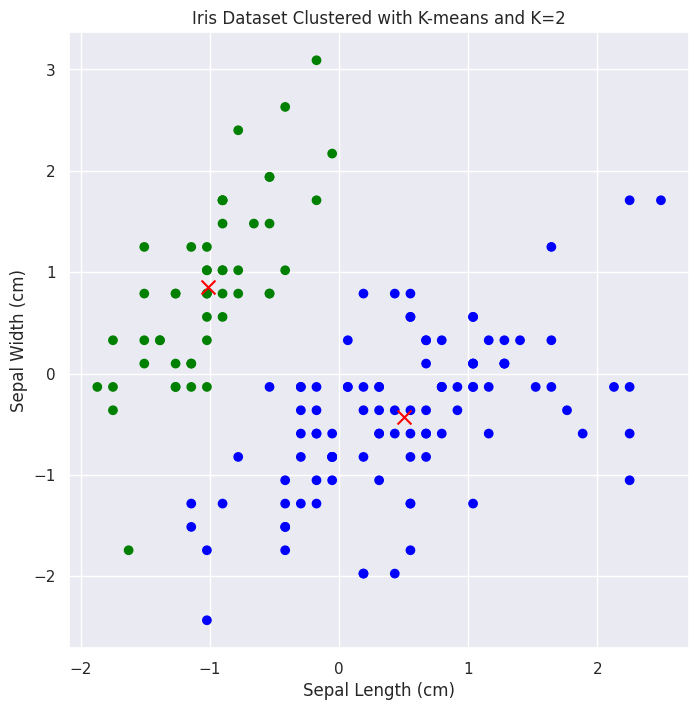

In [98]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(iris_kclustered)

# Add the cluster labels to the dataframe
iris_kclustered['cluster'] = kmeans.labels_
cluster_colors = ['blue', 'green']

# Plot the clusters
plt.scatter(iris_kclustered['sepal length (cm)'], iris_kclustered['sepal width (cm)'], c=[cluster_colors[i] for i in iris_kclustered['cluster']])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset Clustered with K-means and K=2')
plt.show()

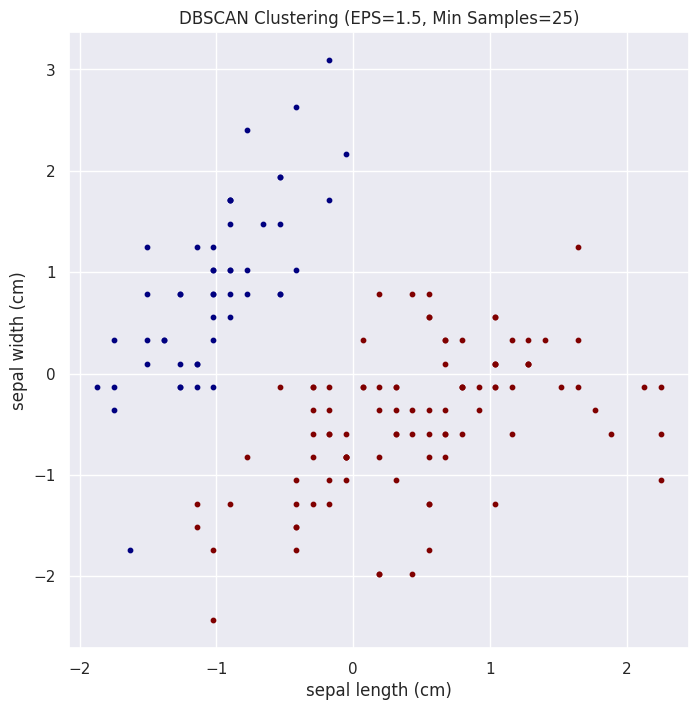

In [105]:
# Perforn DBSCAN with different values of EPS and Min_Samples
iris_db_clusters = perform_dbscan(iris_norm, 1.5, 25)
plot_dbscan(iris_norm, iris_db_clusters, 1.5, 25)

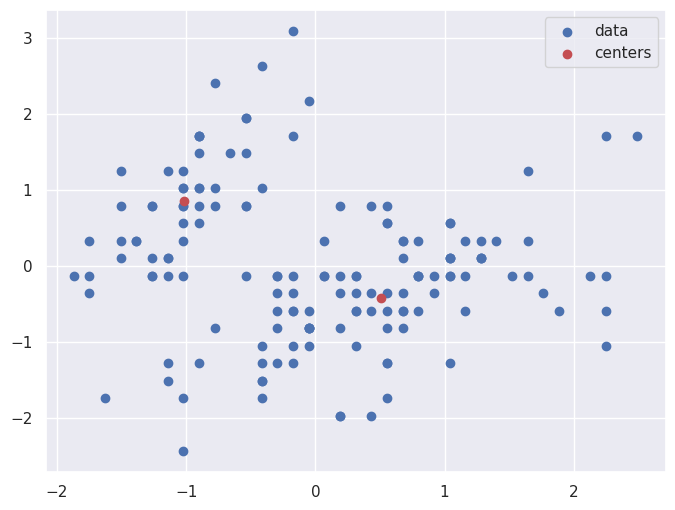

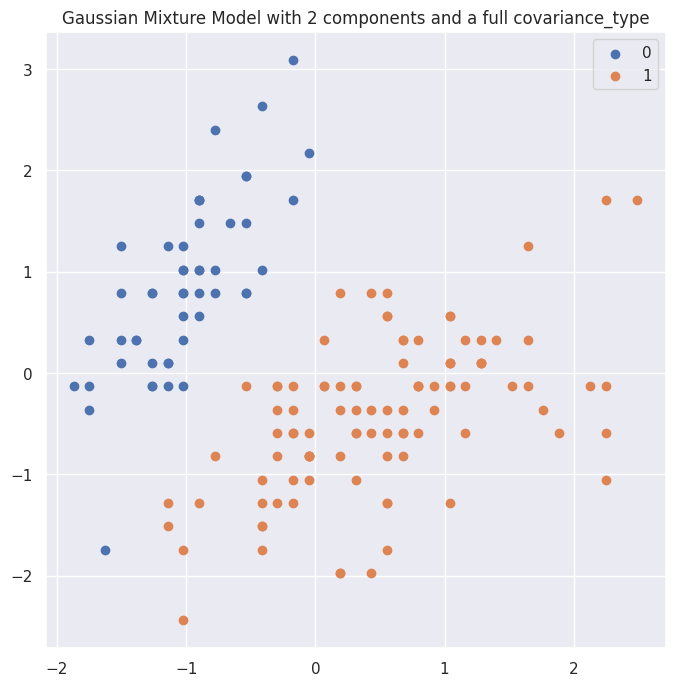

In [106]:
iris_gmm=iris_norm.copy()
perform_gmm(iris_gmm,2,"full")

## Customer dataset
Repeat all the above on the customer data set 

In [109]:
customer_df =  pd.read_csv('Customer data.csv', index_col='ID')

In [110]:
customer_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [142]:
#Normilze data
customer_df_norm=customer_df.copy()
customer_df_norm[["Age","Income"]]=scaler.fit_transform(customer_df[["Age","Income"]])
customer_df_norm[["Age","Income"]]

,Age,Income
ID,,
100000001,2.653614,0.097524
100000002,-1.187132,0.782654
100000003,1.117316,-0.833202
100000004,0.775916,1.328386
100000005,1.458716,0.736932
...,...,...
100001996,0.946616,0.067471
100001997,-0.760382,-0.084265
100001998,-0.418983,-0.906957


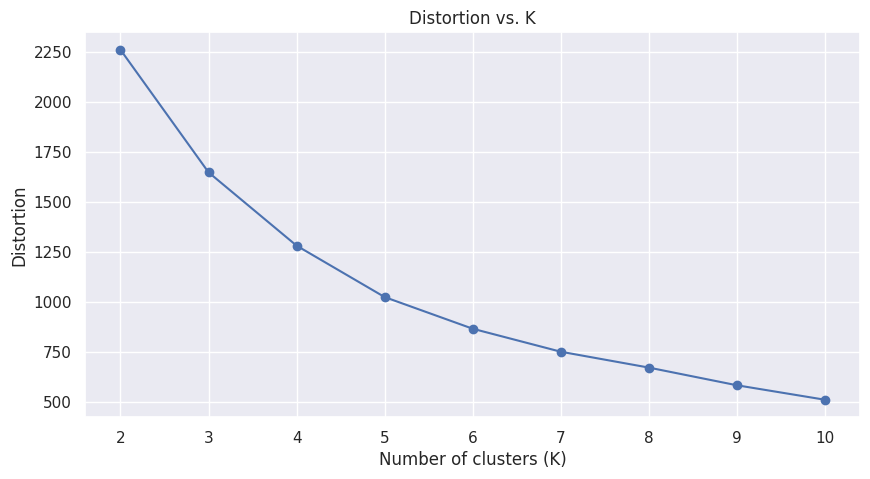

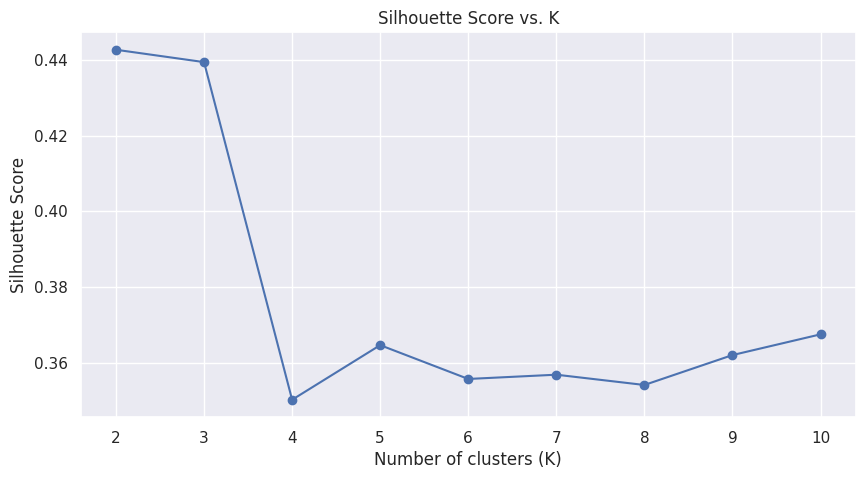

Best K value based on silhouette score: 2
Silhouette score for the best K: 0.4426136888954895


In [113]:
customer_kclustered=customer_df_norm.copy()
best_k, best_silhouette_score = find_best_k(customer_kclustered[["Age","Income"]])

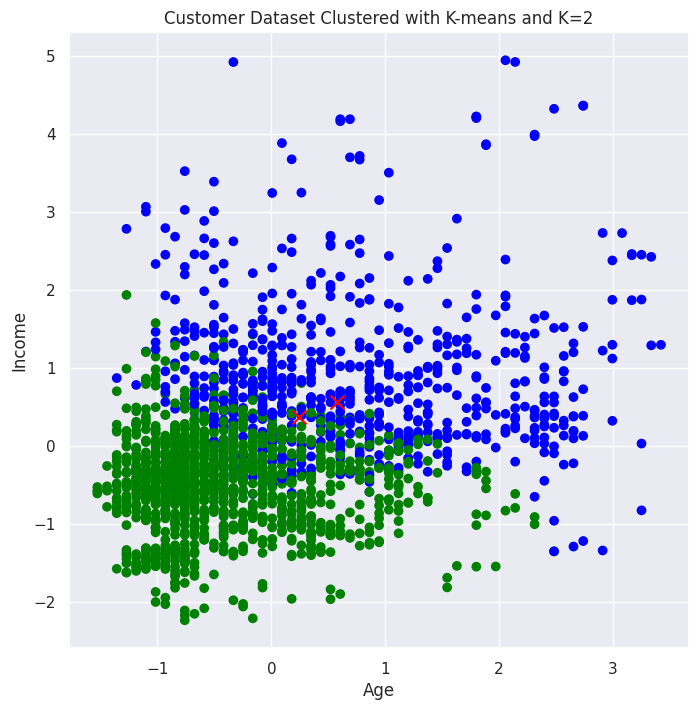

In [115]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(customer_kclustered)

# Add the cluster labels to the dataframe
customer_kclustered['cluster'] = kmeans.labels_
cluster_colors = ['blue', 'green']

# Plot the clusters
plt.scatter(customer_kclustered['Age'], customer_kclustered['Income'], c=[cluster_colors[i] for i in customer_kclustered['cluster']])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Dataset Clustered with K-means and K=2')
plt.show()

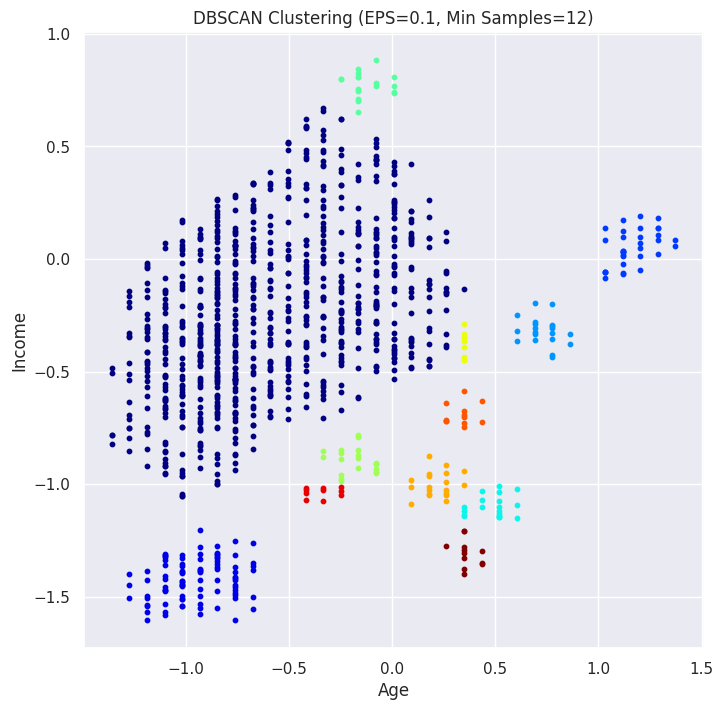

In [136]:
customer_db_clusters = perform_dbscan(customer_df_norm[['Age','Income']], 0.1, 12)
plot_dbscan(customer_df_norm[['Age','Income']], customer_db_clusters, 0.1, 12)

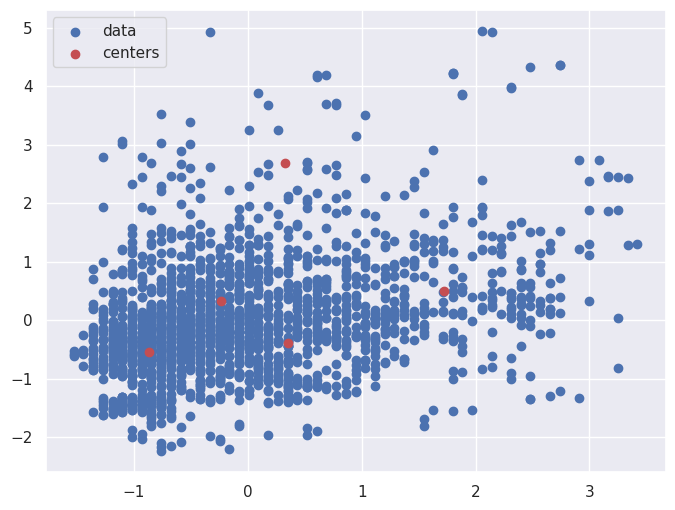

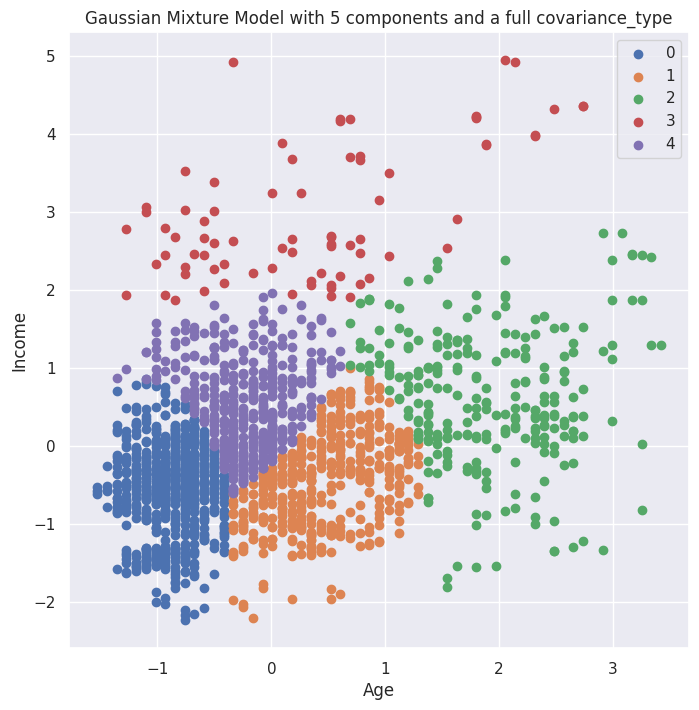

In [140]:
customer_gmm=customer_df_norm.copy()
perform_gmm(customer_gmm[['Age','Income']],5,"full")